# Lecture 23 Part 1 - PCA Application & Performance Measures for Classification Tasks

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['axes.grid'] = False

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Target Labels
t = df_wine['Class label'].values

# Feature Matrix
X = df_wine.drop(['Class label'], axis=1).values
print(X.shape)

# Stratified partition of the data into training/test sets
X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.3, 
                                                    stratify=t)
# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(178, 13)


Coming back to the wine dataset:

In [4]:
X_train.shape

(124, 13)

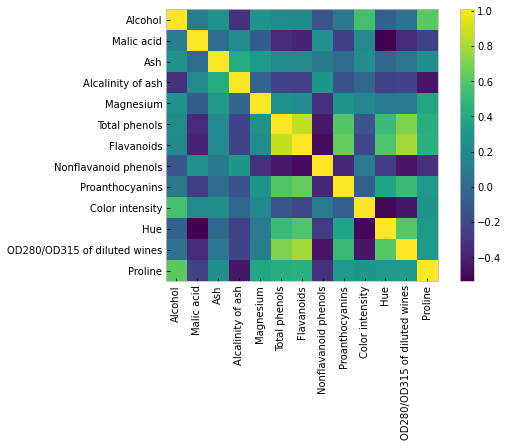

In [5]:
cov_train = np.cov(X_train.T)
# np.cov expects the input to be D-by-N matrix

plt.figure(figsize=(8,5))
plt.imshow(cov_train)
plt.colorbar()
plt.xticks(range(13),df_wine.columns[1:],rotation=90)
plt.yticks(range(13),df_wine.columns[1:]);

Building a function to implement PCA from scratch:

In [6]:
def myPCA(X, m, display=1):
    '''This function implements PCA. The data matrix X is DxN matrix, 
    where D is the dimension and N the number of points'''
    
    D, N = X.shape
    
    # Demean the Data
    data = X - X.mean(axis=1).reshape(-1, 1)
    
    # Covariance of the input  X
    cov_mat = np.cov(data)
    
    # Find eigenvectors and eigenvalues 
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
    # by default np.linalg.eigh will store eigenvectors/eigenvalues in increasing order
    
    # Sort eigenvectors by magnitude of eigenvalues
    L = eigen_vals[::-1]
    U = eigen_vecs[:,::-1]

    # Linear transformation
    A = U[:,:m].T
    
    #compute explained variance and visualize it
    cumulative_var_exp=0
    total = sum(L)
    var_explained = [(i/total) for i in L]
    cumulative_var_exp = np.cumsum(var_explained)
    
    if display:
        plt.bar(range(1,D+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1,D+1), cumulative_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best');
        
    return A, var_explained

In [7]:
X_train.shape # N-by-D

(124, 13)

(13, 13)

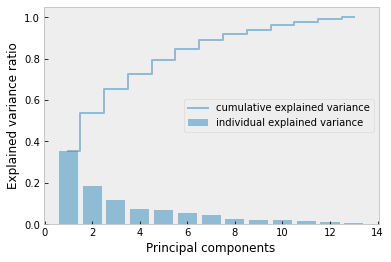

In [8]:
A, var_explained = myPCA(X_train.T, 13, display=1)


A.shape

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data.

Although the explained variance plot reminds us of the feature importance, we shall remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored.

In [10]:
# PCA transformation

X_train_pca = (A@X_train.T).T # N-by-D matrix


X_train_pca.shape

(124, 13)

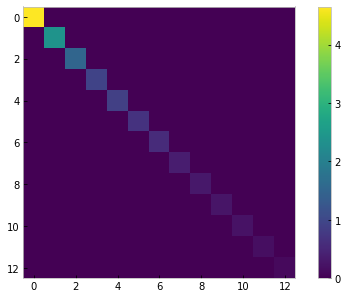

In [11]:
cov_mat = np.cov(X_train_pca.T)

plt.figure(figsize=(8,5))
plt.imshow(cov_mat)
plt.colorbar();

In [18]:
cov_mat

array([[ 4.65055604e+00, -1.24854195e-15, -1.64548025e-16,
         1.11407024e-15, -8.14164841e-16,  8.50353368e-17,
         7.35628817e-18,  1.99737724e-16, -7.62439885e-17,
         1.67168792e-16,  2.47048415e-16,  2.05877572e-16,
        -2.61759900e-16],
       [-1.24854195e-15,  2.39666980e+00,  5.76236166e-17,
         1.47797532e-16, -3.06880064e-16, -4.25094454e-17,
         4.02120608e-16,  2.46441830e-17,  5.26859396e-16,
         3.62132692e-16, -1.27537693e-16,  2.90599077e-16,
        -9.92882380e-17],
       [-1.64548025e-16,  5.76236166e-17,  1.51899223e+00,
        -1.10165031e-16, -4.80949358e-16, -1.39132128e-18,
        -4.93311390e-16,  1.70341541e-16,  6.13211889e-16,
         2.05518679e-16,  6.86414533e-16,  2.58194118e-16,
        -4.24231562e-17],
       [ 1.11407024e-15,  1.47797532e-16, -1.10165031e-16,
         9.40848534e-01, -9.57186993e-16,  2.19090182e-16,
         2.51079625e-16, -2.74324210e-16,  1.83409821e-16,
         2.54558548e-16, -1.41566282e

## PCA with ```scikit-learn```

In [12]:
from sklearn.decomposition import PCA 

In [14]:
PCA?

In [15]:
pca = PCA(n_components=13)

pca

PCA(n_components=13)

In [16]:
pca.fit(X_train)

# training the pca object

PCA(n_components=13)

In [17]:
pca.explained_variance_

array([4.65055604, 2.3966698 , 1.51899223, 0.94084853, 0.88371111,
       0.68650674, 0.57266754, 0.36614204, 0.29701118, 0.26843204,
       0.23517618, 0.17630857, 0.11266905])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35485012, 0.53772257, 0.65362582, 0.72541513, 0.7928447 ,
       0.84522704, 0.88892314, 0.91686077, 0.93952354, 0.96000563,
       0.97795022, 0.99140304, 1.        ])

In [20]:
# The matrix A = U.T is 

pca.components_.shape

(13, 13)

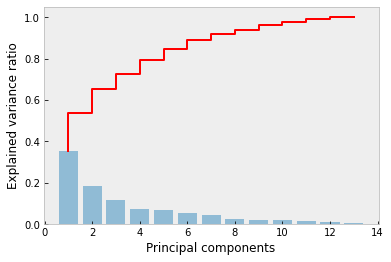

In [21]:
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_),c='r')
plt.bar(range(1,14),pca.explained_variance_ratio_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components');

In [22]:
np.where(np.cumsum(pca.explained_variance_ratio_) >=0.9)

(array([ 7,  8,  9, 10, 11, 12], dtype=int64),)

In [23]:
np.cumsum(pca.explained_variance_ratio_)[7]

0.9168607724765693

In [24]:
y_train_pca = pca.transform(X_train) #A@X_train.T

y_train_pca.shape

(124, 13)

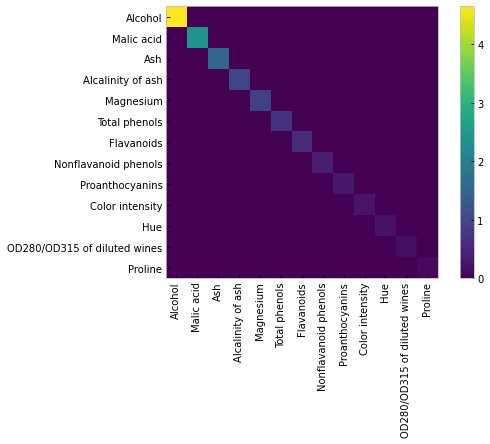

In [25]:
cov_mat = np.cov(y_train_pca.T)

plt.figure(figsize=(8,5))
plt.imshow(cov_mat)
plt.colorbar()
plt.xticks(range(13),df_wine.columns[1:],rotation=90)
plt.yticks(range(13),df_wine.columns[1:]);

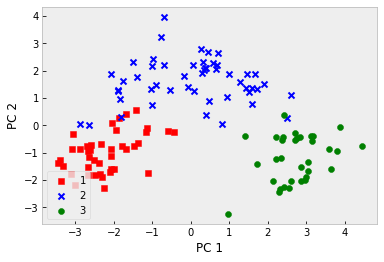

In [26]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(t_train), colors, markers):
    plt.scatter(y_train_pca[t_train==l, 0], y_train_pca[t_train==l, 1],c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

The training data is used to find the new features (eigenvectors). We can then represent the test set in this new feature space:

In [27]:
y_test_pca = pca.transform(X_test) #A@X_test.T

y_test_pca.shape

(54, 13)

---

## Example: Eigenfaces - Dataset Decomposition

In [28]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(return_X_y=False)

# print(faces.DESCR)

In [29]:
X = faces.data # data matrix

t = faces.target # target label

X.shape, t.shape # 400 images, each of size 64x64=4096 pixels

((400, 4096), (400,))

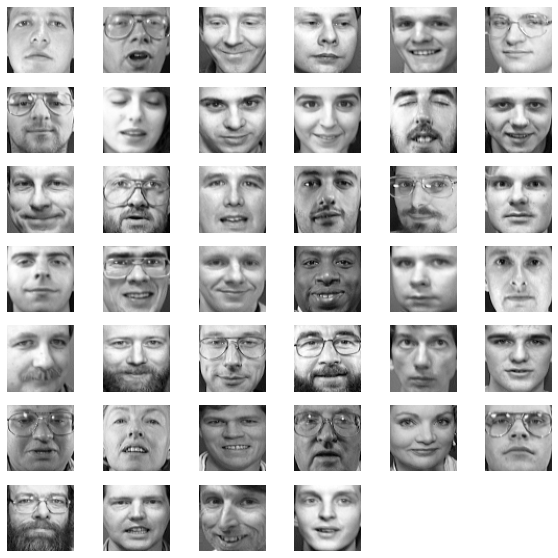

In [30]:
fig = plt.figure(figsize=(10,10))
for i in range(40):
    fig.add_subplot(7,6,i+1)
    idx = np.random.choice(np.where(t==i)[0])
    plt.imshow(X[idx,:].reshape(64,64), cmap='gray')
    plt.axis('off')

In [31]:
np.unique(t, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10], dtype=int64))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((320, 4096), (320,), (80, 4096), (80,))

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

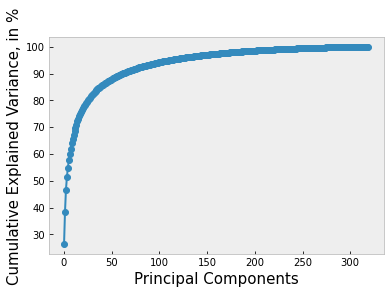

In [34]:
pca = PCA(n_components=320)
pca.fit_transform(X_train_scaled);

plt.plot(100*np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal Components',size=15)
plt.ylabel('Cumulative Explained Variance, in %', size=15);

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26222053, 0.3837615 , 0.46618384, 0.51325184, 0.54706043,
       0.57680434, 0.5999966 , 0.6201292 , 0.6393128 , 0.6561432 ,
       0.6717103 , 0.6851146 , 0.6977544 , 0.7097174 , 0.7209915 ,
       0.73112214, 0.73983663, 0.74830997, 0.75650233, 0.76390773,
       0.7709245 , 0.7774063 , 0.78363425, 0.78951514, 0.7950188 ,
       0.80026454, 0.80534273, 0.81023884, 0.8148485 , 0.81911826,
       0.8231793 , 0.82722455, 0.83095217, 0.8344677 , 0.83793795,
       0.84133005, 0.84446174, 0.84752935, 0.8505306 , 0.85339916,
       0.85620475, 0.85882545, 0.8613985 , 0.86393654, 0.8664041 ,
       0.86880726, 0.871115  , 0.87336886, 0.8755738 , 0.8777162 ,
       0.879808  , 0.88180697, 0.8837133 , 0.8855643 , 0.88734275,
       0.8891022 , 0.89083225, 0.8925449 , 0.8942304 , 0.8958646 ,
       0.89746374, 0.8990333 , 0.900588  , 0.90208685, 0.90355617,
       0.9050007 , 0.90642554, 0.90781415, 0.90916413, 0.91049826,
       0.9118218 , 0.9131064 , 0.9143806 , 0.91561925, 0.91684

In [36]:
np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.9)

(array([ 62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
        192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
        218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
        231, 232, 233, 234, 235, 236, 237, 238, 239

In [37]:
np.cumsum(pca.explained_variance_ratio_)[62]

0.900588

In order to explain 90% of the variance in the data, we need to preserve 63 principal components.

---

Let's project to 2-D so we can plot it:

In [41]:
# PCA (unsupervised)

pca = PCA(n_components=2)
ypca = pca.fit_transform(X_train_scaled)

ypca.shape

(320, 2)

In [42]:
# LDA (supervised)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
ylda = lda.fit_transform(X_train_scaled, t_train)

ylda.shape

(320, 2)

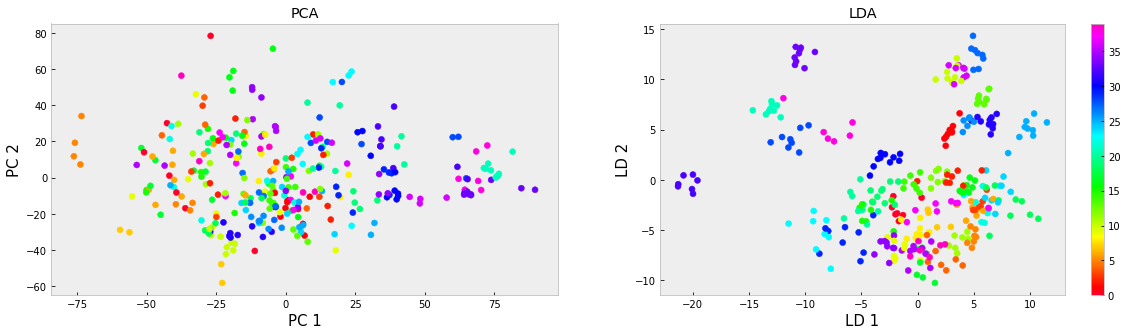

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(ypca[:,0], ypca[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('PC 1', size=15)
plt.ylabel('PC 2', size=15)
plt.title('PCA')

plt.subplot(1,2,2)
plt.scatter(ylda[:,0], ylda[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('LD 1', size=15)
plt.ylabel('LD 2', size=15)
plt.title('LDA')
plt.rcParams['axes.grid'] = False
plt.colorbar();

Not that the 40 classes are overlapping in the linear projection space. This is because PCA is **unsupervised**, it does use the class labels *anywhere* in finding the matrix for linear projection.

---

To apply this transformation in the test set, simply multiply the resultant modal matrix with the scaled test set:

In [44]:
# Transform the test set using the linear transformation found with the training data
ypca_test = pca.transform(X_test_scaled)

ypca_test.shape

(80, 2)

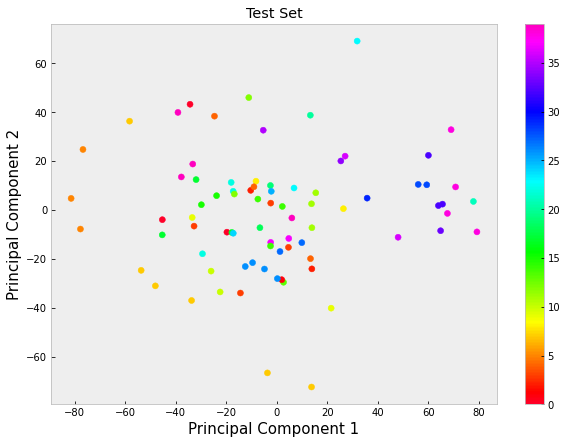

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(ypca_test[:,0], ypca_test[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('Principal Component 1', size=15)
plt.ylabel('Principal Component 2', size=15)
plt.title('Test Set')
plt.colorbar();

You can access the linear transformation $\mathbf{A} = \mathbf{U}^T$ using the method ```components_```:

In [46]:
A = pca.components_

A.shape

(2, 4096)

Note that the eigenvectors are described in the original space, that is, they are 4096-dimensional!

Since we are working with images, we can reshape them back to a $64 \times 64$ image and see what are the regions in the image with maximum explained variance! This is called the **eigenfaces**.

In [48]:
X_test_scaled.shape

(80, 4096)

In [50]:
yyy = (A@X_test_scaled.T).T

yyy.shape

(80, 2)

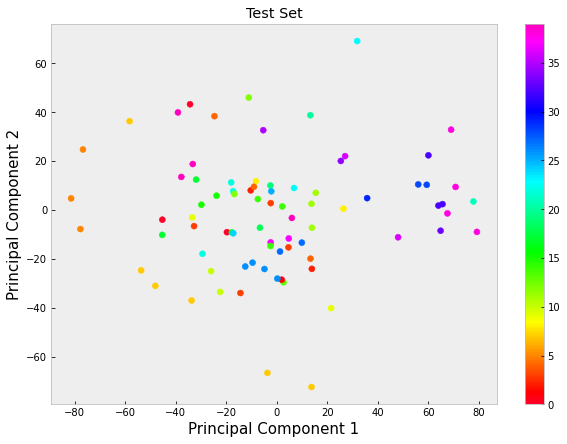

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(yyy[:,0], yyy[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('Principal Component 1', size=15)
plt.ylabel('Principal Component 2', size=15)
plt.title('Test Set')
plt.colorbar();

Let's now recover 16 eigenvectors and plot them as images:

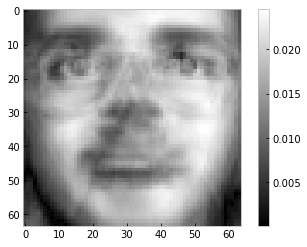

In [56]:
plt.imshow(abs(pca.components_[0,:].reshape(64,64)), cmap='gray')
plt.colorbar();

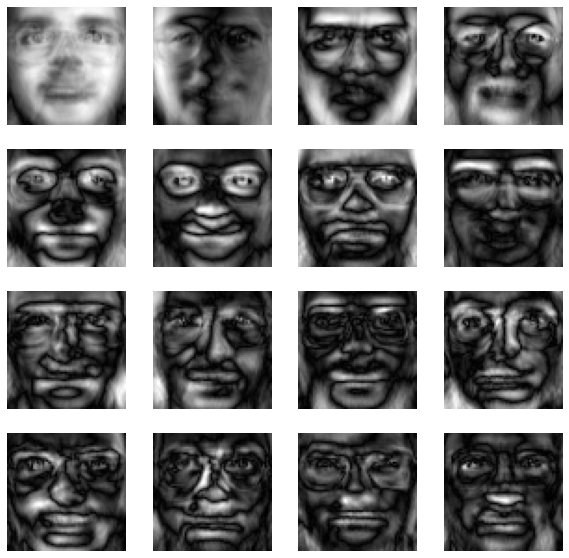

In [57]:
n_components = 16

pca = PCA(n_components=n_components)
ypca = pca.fit_transform(X_train_scaled)

fig=plt.figure(figsize=(10,10))
for i in range(n_components):
    fig.add_subplot(4,4,i+1)
    plt.imshow(abs(pca.components_[i,:].reshape(64,64)),cmap='gray')
    plt.axis('off')

The eigenvectors are describing the regions in the 64x64 image that explain the most variance. the more eigenvectors are kept, the better a reconstruction image will be produced.

For example, let's reconstruct the images in the dataset using the top 16 eigenvectors:

In [58]:
K = np.cov(X_train_scaled.T)

L, U = np.linalg.eigh(K)

L

array([-2.26986066e-13, -1.48546929e-13, -1.48270146e-13, ...,
        3.38660292e+02,  4.99392055e+02,  1.07742245e+03])

In [59]:
L = L[::-1]
U = U[:, ::-1] # eigenvectors are placed in columns

In [72]:
L

array([ 1.07742245e+03,  4.99392055e+02,  3.38660292e+02, ...,
       -1.48270146e-13, -1.48546929e-13, -2.26986066e-13])

In [60]:
U.shape

(4096, 4096)

In [63]:
N_eigenvectors = 9

P = U[:, :N_eigenvectors]

X_proj = X_train_scaled@P # (P@X_train_scaled.T).T
X_reconstruct = X_proj@np.linalg.pinv(P)

X_reconstruct.shape

(320, 4096)

Since the projection is given by:

$$\mathbf{Y} = \mathbf{A}\mathbf{X}$$

In order to recover $\mathbf{X}$, we need to left-multiply by the pseudo-inverse of $\mathbf{A}$:

$$\hat{\mathbf{X}} = \mathbf{A}^\dagger\mathbf{Y}$$

In [64]:
# Alternatively

ypca = pca.transform(X_train_scaled)
X_reconstruct_skl = pca.inverse_transform(ypca)

X_reconstruct_skl.shape

(320, 4096)

We also need to bringing back to the original scaling: multiplying by the standard deviation and adding the sample mean value:

In [65]:
X_reconstructed = scaler.inverse_transform(X_reconstruct)

X_reconstructed_skl = scaler.inverse_transform(X_reconstruct_skl)

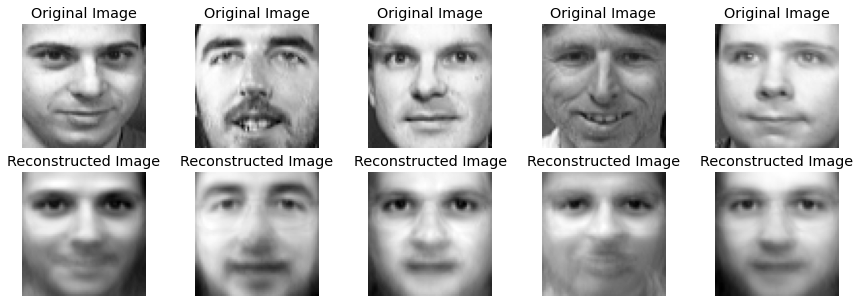

In [66]:
N = 5
idx = np.random.choice(range(X_reconstructed.shape[0]),replace=False,size=N)

fig = plt.figure(figsize=(15,5))

j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconstructed[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1

Putting it all together:

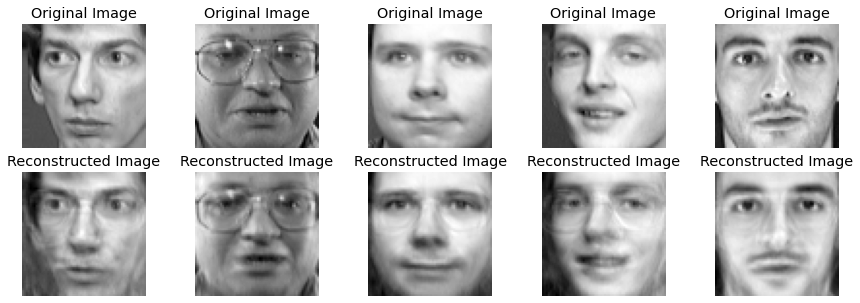

In [71]:
N_eigenvectors = 63

pca = PCA(n_components=N_eigenvectors)
ypca = pca.fit_transform(X_train_scaled)
X_reconstruct = pca.inverse_transform(ypca)
X_reconstructed = scaler.inverse_transform(X_reconstruct)

N = 5

fig = plt.figure(figsize=(15,5))
idx = np.random.choice(range(X_reconstructed.shape[0]),replace=False,size=N)
j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconstructed[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1

Still some compression loss but much better representation!

---

# Performance Metrics

A key step in machine learning algorithm development and testing is determining a good error and evaluation metric.

**Evaluation metrics** help us to estimate how well our model is trained and it is important to pick a metric that matches our overall goal for the system.

Some common evaluation metrics include precision, recall, receiver operating curves, and confusion matrices.

## Classification Accuracy and Error

Classification accuracy and e the number of correct predictions made as a ratio of all predictions made.

* **Classification accuracy** is defined as the number of correctly classified samples divided by all samples:

\begin{align*}
\text{accuracy} = \frac{N_{\text{corr}}}{N}
\end{align*}

where $N_{\text{corr}}$ is the number of correct classified samples and $N$ is the total number of samples.

* **Classification error** is defined as the number of incorrectly classified samples divided by all samples:

\begin{align*}
\text{error} = \frac{N_{\text{miss}}}{N}
\end{align*}

where $N_{\text{miss}}$ is the number of misclassified samples and $N$ is the total number of samples.

* Classification accuracy is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

## Example 1: Fish Dataset
Suppose there is a 3-class classification problem, in which we would like to classify each training sample (a fish) to one of the three classes (A = salmon or B = sea bass or C = cod).

Let's assume there are 150 samples, including 30 salmon, 40 sea bass and 80 cod. Suppose our model misclassifies 4 salmon, 2 sea bass and 5 cod.

* The classification accuracy (ACC) of our binary classification model is calculated as:

\begin{align*}
\text{ACC} = \frac{26 + 38 + 75}{30 + 40 + 80} = \frac{139}{150} \approx 92.7 \%
\end{align*}

* The prediction error is calculated as:

\begin{align*}
\text{error} = \frac{4 + 2 + 5}{30+40+80} = \frac{11}{150} \approx 7.3 \%
\end{align*}

* The classification accuracy doesn't really gives an insight on which class is being misclassified the most.

## Confusion Matrix

A confusion matrix summarizes the classification accuracy across several classes. It shows the ways in which the classification model is confused when it makes predictions, allowing visualization of the performance of our algorithm. 

Generally, each row represents the instances of a actual class while each column represents the instances in an predicted class.

If the classifier is trained to distinguish between salmon, sea bass and cod. We can summarize the prediction result in the confusion matrix as follows:

|actual/predict|    salmon    |    sea bass  |      cod     |
|--------------|--------------|--------------|--------------|
|    salmon    |      26      |       2      |       2      |
|    sea bass  |       2      |       38     |       0      |
|      cod     |       2      |       3      |       75     |


In this confusion matrix, of the 30 salmons (row 1), the classifier predicted that 26 are labeled salmon correctly, 2 are wrongly labeled as sea bass, and another 2 are wrongly labeled as cod. 

All correct predictions are located in the diagonal of the table. So it is easy to visually inspect the table for prediction errors, as they will be represented by values outside the diagonal.

## Precision, Recall & Fall-Out

We are often looking to discriminate between observations with a specific binary outcome, for example, event or no event. In our example, the fish company would like to produce salmon can but the harvest contains all three species. In this way,
we can assign the event (salmon) as "positive" and no-event (not salmon) as "negative".

The confusion matrix for this two-class classification problem is:

|actual/predict|    salmon    |  non-salmon  |
|--------------|--------------|--------------|
|    salmon    |      26      |       4      |
|  non-salmon  |       4      |      116     |

* **True positive (TP):** correctly predicting positive events
* **False positive (FP):** incorrectly calling positive to a negative event
* **True negative (TN):** correctly predicting negative events
* **False negative (FN):** incorrectly labeling negative to a positive event

*In this salmon/non-salmon classification problem, what are the TP, FP, TN, FN values?*

|actual/predict|   Positive   |   Negative   |
|--------------|--------------|--------------|
|   Positive   |      TP      |      FN      |
|   Negative   |      FP      |      TN      |

* **Precision**, also called Positive Predictive Value (PPV), is the performance of detection

\begin{align*}
\text{Precision} = \text{PPV} = \frac{TP}{TP + FP}
\end{align*}

* **Recall**, also called True Positive Rate (TPR) or Sensitivity, is the probability of detection

\begin{align*}
\text{Recall} = \text{TPR} = \text{Sensitivity} = \frac{TP}{TP + FN}
\end{align*}

* **Fall-out**, also called False Positive Rate (FPR), is the probability of false alarm

\begin{align*}
\text{Fall-out} = \text{FPR} = \frac{FP}{FP + TN}
\end{align*}

* **Specificity**, also called True Negative Rate (TNR), is the probability of negative events detection

\begin{align*}
\text{Specificity} = \frac{TN}{TN + FP}
\end{align*}

* **F1-score**, also called F-score or F-measure, is a measure of a model's accuracy. It considers both the precision and the recall.

\begin{align*}
\text{F1-score} = 2\times\frac{\text{Precision}\times \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}

* Learn about many other measures on this [Wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) and [Scikit-Learn's Classification Metrics Module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## ROC Curves

**Receiver Operating Characteristic (ROC) curve** is the plot between the true positive rate (TPR) and the false positive rate (FPR), where the TPR is defined as the y-axis and FPR is defined as the x-axis.

* ROC curves were first developed for RADAR systems, hence the name.

* Given a binary classifier and its threshold, the (x,y) coordinates of ROC space can be calculated from all the prediction result. You trace out a ROC curve by varying the threshold to get all of the points on the ROC.

* The diagonal between (0,0) and (1,1) separates the ROC space into two areas, which are left up area and right bottom area. The points above the diagonal represent good classification (better than random guess) which below the diagonal represent bad classification (worse than random guess).

* *What is the perfect prediction point in a ROC curve?*


### Area Under the Curve (AUC)

**Area Under Curve (AUC)** is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

___

## <font color='blue'>Example</font>

1. Suppose you have a target detection task that you would like to evaluate using ROC curve analysis. You emplaced 5 targets and collected aerial hyperspectral imagery over 10 $km^2$. Then, suppose you ran a set of alarm generation and target detection algorithms over the collected data. Your algorithms produced the following list of alarm confidence values. You have already matched each of these alarms to a location on the ground and compared them with your ground truth. True targets, based on your ground truth, are marked with a "T" in the second column. Draw the associated ROC cure for these results.

Alarm confidence values |  0.91  |  0.90  |  0.80  |  0.79  |  0.77  |  0.75  |  0.50  |  0.40  |  0.39  |  0.38  |  0.37  |  0.25  |  0.10  |  0.09  |  0.01  |
------------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
    Ground truth        |   T    |   T    |        |   T    |        |        |        |   T    |        |        |        |        |        |   T    |        |


2. Suppose you were segmenting a data set into three classes (e.g., vegetation, man-made materials, sand) and wanted to evaluate your results. Would using a ROC curve be an appropriate method for evaluation? Why or why not?

___